
# **Creacion de un perceptron de forma manual sin libreria**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Exactitud: 0.07777777777777778


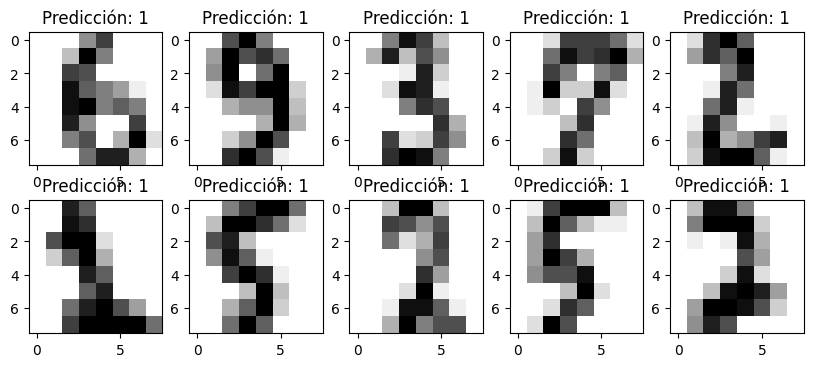

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Función de activación (función escalón)
def activacion(valor):
    if valor >= 0:
        return 1
    else:
        return 0

# Función de entrenamiento del perceptrón
def entrenar_perceptron(X, Y, lr=0.1, epochs=1000):
    num_entradas = X.shape[1]
    num_muestras = X.shape[0]
    pesos = np.random.rand(num_entradas)
    for epoch in range(epochs):
        for i in range(num_muestras):
            entrada = X[i]
            salida_real = Y[i]
            salida_predicha = activacion(np.dot(entrada, pesos))
            error = salida_real - salida_predicha
            pesos += lr * error * entrada
    return pesos

# Cargar el conjunto de datos de Dígitos
digits = datasets.load_digits()
X = digits.data
Y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar el perceptrón
pesos_entrenados = entrenar_perceptron(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
Y_pred = [activacion(np.dot(x, pesos_entrenados)) for x in X_test]

# Calcular la precisión del modelo
exactitud = accuracy_score(Y_test, Y_pred)
print("Exactitud:", exactitud)

# Visualizar algunos ejemplos y sus predicciones
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predicción: {Y_pred[i]}')
plt.show()

# **Ejemplo de perceptron con libreria**

### **Etapa1**
Utilizar tensorflow para poder crear percetron de forma mas simple y limpia, ademas la libreria nos posibilita empezar a trabajar con redes neuronales multicapas


In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de Dígitos
digits = datasets.load_digits()
X = digits.data
Y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un perceptrón simple en TensorFlow
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con backpropagation
model.fit(X_train, Y_train, epochs=100, verbose=1)

# Realizar predicciones en el conjunto de prueba
Y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calcular la precisión del modelo
exactitud = accuracy_score(Y_test, Y_pred)
print("Exactitud:", exactitud)


Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: -16.5232 - accuracy: 0.1663
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: -62.6264 - accuracy: 0.1072
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: -108.3151 - accuracy: 0.1072
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: -154.3869 - accuracy: 0.1072
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: -201.3161 - accuracy: 0.1072
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: -248.0877 - accuracy: 0.1072
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: -295.2192 - accuracy: 0.1072
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: -342.3384 - accuracy: 0.1072
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: -389.4898 - accuracy: 0.1072
Epoch 10/100
45/45 [==============================] - 0s 1ms/step - loss: -436.9776 

### **Etapa3**
Entrenamos al modelo creamos un perceptron simple y tratamos de introducir una matriz 8x8 de un digito para saber si el modelo lo podria predecir

Epoch 1/50
45/45 [==============================] - 0s 2ms/step - loss: -30.5152 - accuracy: 0.1044
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: -77.3382 - accuracy: 0.1072
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: -124.1985 - accuracy: 0.1072
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: -171.2211 - accuracy: 0.1072
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: -218.5218 - accuracy: 0.1072
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: -265.8375 - accuracy: 0.1072
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: -313.1956 - accuracy: 0.1072
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: -360.7420 - accuracy: 0.1072
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: -408.0323 - accuracy: 0.1072
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: -455.6829 - accuracy

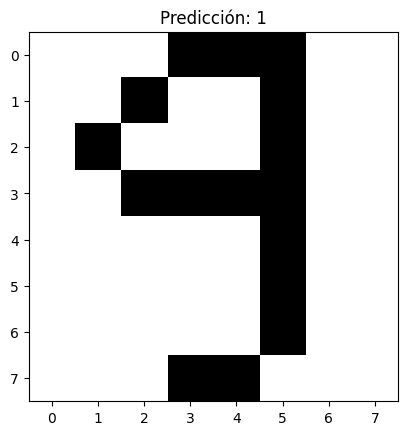

In [28]:

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Cargar el conjunto de datos de dígitos
from sklearn import datasets
digits = datasets.load_digits()

X = digits.data
Y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un perceptrón simple en TensorFlow
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con backpropagation
model.fit(X_train, Y_train, epochs=50, verbose=1)


# Definir una matriz de 8x8 en el formato necesario (valores de 0 a 16) para el número 9
number_9 = [
    [0, 0, 0, 16, 16, 16, 0, 0],
    [0, 0, 16, 0, 0, 16, 0, 0],
    [0, 16, 0, 0, 0, 16, 0, 0], #numero 9
    [0, 0, 16, 16, 16, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 16, 16, 0, 0, 0]
]

# Redimensionar la entrada de la matriz para que tenga 64 características
user_input = np.array(number_9).flatten()

# Realizar la predicción
prediction = model.predict(np.array([user_input]))

# Mostrar la imagen ingresada y la predicción
plt.imshow(np.array(user_input).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

if prediction > 0.5:
    plt.title("Predicción: 1")
else:
    plt.title("Predicción: No es 1")

plt.show()


### **Etapa 4**
Listo hasta este paso ya sabemos que podemos llegar a predecir de un valor en matriz un digito estamos a nada de completar el tema de redesneuronales

Ahora que pasa si un solo perceptron no es suficiente porque tenemos mas entradas por ejemplo queremos que el algoritmo llegue a predecir atravez de cualquier digito que se ingrese o se dibuje el numero plasmado

**Paso 1: Importación de bibliotecas**

In [29]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

En este paso, importamos las bibliotecas necesarias para el funcionamiento del código. **numpy** se utiliza para operaciones numéricas, **tensorflow** para construir y entrenar redes neuronales, **matplotlib** para visualización y **datasets** y **train_test_split** de **scikit-learn** para cargar el conjunto de datos de dígitos y dividir los datos en conjuntos de entrenamiento y prueba.

**Paso 2: Cargar el conjunto de datos**

In [30]:
digits = datasets.load_digits()

En este paso, cargamos el conjunto de datos de dígitos usando la función **load_digits()** de **scikit-learn**. Esto nos proporciona un conjunto de imágenes de dígitos escritos a mano y sus etiquetas asociadas.

**Paso 3: División de los datos en conjuntos de entrenamiento y prueba**

In [31]:
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Dividimos los datos en características **(X)** y etiquetas **(Y)**. Luego, utilizando **train_test_split**, dividimos estos datos en conjuntos de entrenamiento **(X_train, Y_train)** y prueba **(X_test, Y_test)** con una proporción del 80% para entrenamiento y 20% para prueba.

**Paso 4: Creación del modelo de red neuronal**

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

En este paso, creamos un modelo de red neuronal utilizando la API Keras de TensorFlow. El modelo consta de una capa de entrada con 64 neuronas (una para cada característica de las imágenes de 8x8 píxeles), dos capas ocultas con activación ReLU y una capa de salida con 10 neuronas y activación Softmax para clasificar los dígitos.

**ReLU (Rectified Linear Unit):**

**ReLU** es una función de activación no lineal que se utiliza en las capas ocultas de las redes neuronales.
Matemáticamente, la función ReLU se define como **f(x) = max(0, x)**, lo que significa que si el valor de entrada x es positivo, la función devuelve el mismo valor (x), pero si es negativo, devuelve cero.
ReLU es popular debido a su simplicidad y eficacia. Ayuda a superar problemas como la desaparición del gradiente y acelera el proceso de entrenamiento.
En términos intuitivos, ReLU activa una neurona solo si la entrada es suficientemente positiva, lo que permite aprender características relevantes en los datos.

**Softmax:**

**Softmax** es una función de activación utilizada en la capa de salida de una red neuronal en problemas de clasificación multiclase.
Toma un vector de números reales como entrada y devuelve un vector de probabilidades. Cada elemento en el vector de salida representa la probabilidad de que la entrada pertenezca a una clase específica.
La función Softmax realiza una operación de normalización exponencial en las entradas, lo que significa que aumenta la diferencia entre los valores más altos y disminuye la diferencia entre los valores más bajos. Esto es útil para obtener probabilidades más distintas.
La salida de Softmax es útil para tomar decisiones basadas en la probabilidad. La clase con la probabilidad más alta se considera la predicción de la red para un problema de clasificación.

**Paso 5: Compilación del modelo**

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Compilamos el modelo especificando el optimizador (adam), la función de pérdida (sparse_categorical_crossentropy) adecuada para problemas de clasificación y las métricas que deseamos rastrear (en este caso, la precisión).

**optimizer='adam':**

El parámetro optimizer se refiere al algoritmo de optimización que se utilizará durante el entrenamiento de la red neuronal. 'adam' es uno de los optimizadores más populares y eficientes en la actualidad. Adam es una variante del descenso de gradiente estocástico (SGD) que combina las ventajas de otros optimizadores, como el descenso de gradiente con momento y RMSprop.
El optimizador es responsable de ajustar los pesos y sesgos de la red neuronal durante el proceso de entrenamiento para minimizar la función de pérdida.


**loss='sparse_categorical_crossentropy':**

El parámetro loss se refiere a la función de pérdida que se utiliza para medir la discrepancia entre las predicciones del modelo y las etiquetas reales en el conjunto de entrenamiento. 'sparse_categorical_crossentropy' es una función de pérdida comúnmente utilizada en problemas de clasificación cuando las etiquetas son valores enteros (como en clasificación de dígitos, donde los dígitos son números enteros del 0 al 9).
La función sparse_categorical_crossentropy calcula la entropía cruzada entre las distribuciones de probabilidad predichas por el modelo y las distribuciones de probabilidad one-hot codificadas de las etiquetas reales.


**metrics=['accuracy']:**

El parámetro metrics se utiliza para especificar las métricas que se rastrearán durante el entrenamiento del modelo para evaluar su rendimiento. En este caso, hemos seleccionado 'accuracy', que es una métrica común en problemas de clasificación. Mide la proporción de ejemplos clasificados correctamente en el conjunto de entrenamiento.
Durante el entrenamiento, el modelo calculará y mostrará la precisión en cada época para que puedas evaluar cuán bien se está desempeñando en el conjunto de entrenamiento.


**En resumen**, la función model.compile se utiliza para configurar la etapa de entrenamiento de la red neuronal. Establece el optimizador que se utilizará para ajustar los parámetros del modelo, la función de pérdida que se minimizará durante el entrenamiento y las métricas que se rastrearán para evaluar el rendimiento del modelo.

**Paso 6: Entrenamiento del modelo**

In [34]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


36/36 [==============================] - 1s 7ms/step - loss: 2.4764 - accuracy: 0.4317 - val_loss: 0.7627 - val_accuracy: 0.7569
Epoch 2/10
36/36 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8860 - val_loss: 0.3877 - val_accuracy: 0.8715
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9513 - val_loss: 0.2555 - val_accuracy: 0.9062
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9748 - val_loss: 0.2198 - val_accuracy: 0.9201
Epoch 5/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9887 - val_loss: 0.1637 - val_accuracy: 0.9479
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9939 - val_loss: 0.1603 - val_accuracy: 0.9410
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9956 - val_loss: 0.1411 - val_accuracy: 0.9514
Epoch 8/10
36/36 [=============

Entrenamos el modelo con los datos de entrenamiento (X_train y Y_train) durante 10 épocas y con un tamaño de lote de 32. Además, especificamos una fracción de validación del 20% para monitorear el rendimiento del modelo durante el entrenamiento.

**X_train y Y_train:**

**X_train** se refiere al conjunto de datos de características (por ejemplo, imágenes de dígitos) que se utilizarán como datos de entrenamiento.
**Y_train** se refiere al conjunto de etiquetas (por ejemplo, los números reales que representan los dígitos) que corresponden a las características en X_train.


**epochs=10:**

El parámetro **epochs** especifica el número de épocas o iteraciones completas a través del conjunto de entrenamiento. Cada época implica que el modelo verá todos los ejemplos de entrenamiento una vez. En este caso, el modelo se entrenará durante 10 épocas.


**batch_size=32:**

El parámetro **batch_size** determina el tamaño del lote o subconjunto de ejemplos de entrenamiento que se utilizará en cada paso de optimización. En lugar de ajustar los pesos después de cada ejemplo, el modelo ajusta los pesos después de un conjunto de ejemplos, lo que acelera el proceso de entrenamiento y a menudo mejora la convergencia.
En este caso, se utilizan lotes de 32 ejemplos a la vez para ajustar los pesos del modelo.


**validation_split=0.2:**

El parámetro **validation_split** se utiliza para especificar la fracción de datos de entrenamiento que se utilizará como conjunto de validación durante el entrenamiento. El conjunto de validación se utiliza para monitorear el rendimiento del modelo y evitar el sobreajuste.
En este caso, el 20% de los datos de entrenamiento se reservan como conjunto de validación. Esto significa que durante el entrenamiento, el modelo verá el 80% de los datos para ajustar los pesos y el 20% se utilizará para evaluar el rendimiento en cada época.

**Paso 7: Permitir al usuario ingresar una matriz**

In [35]:
user_input = [
    [0, 0, 0, 16, 16, 16, 0, 0],
    [0, 0, 16, 0, 0, 16, 0, 0],
    [0, 16, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 16, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 16, 16, 0, 0, 0]
]
#numero9

En este paso, definimos una matriz que el usuario podría ingresar para que el modelo realice una predicción. Esta matriz representa un dígito, en este caso, el número "9".

**Paso 8: Redimensionar la entrada del usuario**

In [36]:
user_input = np.array(user_input).flatten()


La matriz ingresada por el usuario se redimensiona para tener 64 características, ya que el modelo espera una entrada de 64 características.

**.flatten():** Después de haber convertido la matriz en un array de NumPy, se llama al método flatten(). Este método se utiliza para transformar el array en un vector unidimensional. Cada elemento de la matriz bidimensional se coloca en una secuencia lineal, de manera que todos los elementos se almacenan uno tras otro en un solo vector.

**Paso 9: Realización de la predicción**

In [37]:
predicted_digit = model.predict(np.array([user_input]))


1/1 [==============================] - 0s 65ms/step


El modelo realiza una predicción en la matriz ingresada por el usuario utilizando la función **model.predict()**.

**Paso 10: Obtención del dígito predicho**

In [38]:
predicted_digit = np.argmax(predicted_digit)


Obtenemos el dígito predicho tomando el índice de la neurona con la probabilidad más alta como la predicción final.

**Paso 11: Mostrar la imagen y la predicción**

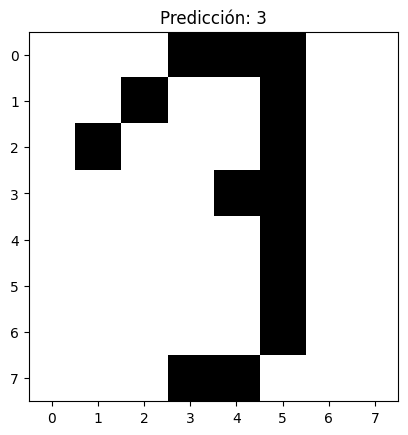

In [39]:
plt.imshow(user_input.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Predicción: {predicted_digit}")
plt.show()

**Ejemplo Completo**

Epoch 1/10
36/36 [==============================] - 1s 8ms/step - loss: 2.5062 - accuracy: 0.4891 - val_loss: 0.5571 - val_accuracy: 0.8264
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8964 - val_loss: 0.3012 - val_accuracy: 0.8854
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.9513 - val_loss: 0.2119 - val_accuracy: 0.9340
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.9713 - val_loss: 0.1909 - val_accuracy: 0.9410
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9869 - val_loss: 0.1842 - val_accuracy: 0.9444
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9922 - val_loss: 0.1493 - val_accuracy: 0.9444
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9956 - val_loss: 0.1434 - val_accuracy: 0.9375
Epoch 8/10
36/36 [==

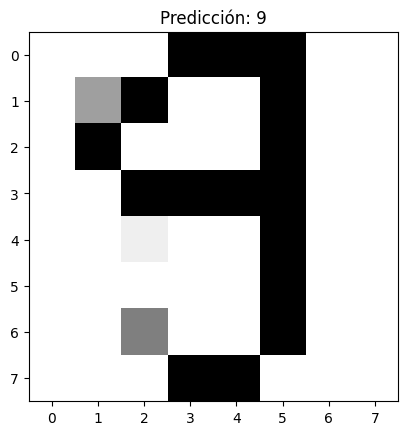

In [40]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos de dígitos de Scikit-Learn
digits = datasets.load_digits()

# Obtener las características (imágenes de dígitos) y las etiquetas (números reales que representan)
X = digits.data
Y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de red neuronal en TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,)),  # Entrada de 64 características
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 unidades y función de activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta con 64 unidades y función de activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 unidades y función de activación Softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Permitir al usuario ingresar una matriz
user_input = [
    [0, 0, 0, 16, 16, 16, 0, 0],
    [0, 6, 16, 0, 0, 16, 0, 0],
    [0, 16, 0, 0, 0, 16, 0, 0],
    [0, 0, 16, 16, 16, 16, 0, 0],
    [0, 0, 1, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 8, 0, 0, 16, 0, 0],
    [0, 0, 0, 16, 16, 0, 0, 0]
]

# Redimensionar la entrada del usuario para que tenga 64 características
user_input = np.array(user_input).flatten()

# Realizar la predicción en la matriz ingresada
predicted_digit = model.predict(np.array([user_input]))

# Obtener el dígito predicho
predicted_digit = np.argmax(predicted_digit)

# Mostrar la imagen ingresada y la predicción
plt.imshow(user_input.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Predicción: {predicted_digit}")
plt.show()


###**Posible solucion utilizando como funcion de perdida o loss el minimo error cuadratico**

In [41]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Crear y entrenar un modelo de red neuronal en TensorFlow (similar al original)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,)),  # Entrada de 64 características
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 unidades y función de activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta con 64 unidades y función de activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 unidades y función de activación Softmax
])



In [42]:
# Cargar pesos previamente entrenados si están disponibles
# model.load_weights("model_weights.h5")

# Permitir al usuario ingresar una matriz
user_input = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 15, 14, 1, 0, 0, 0],
    [0, 7, 7, 0, 12, 2, 0, 0],
    [0, 0, 0, 2, 15, 5, 0, 0],
    [0, 0, 0, 7, 14, 2, 0, 0],
    [0, 0, 1, 13, 4, 0, 0, 0],
    [0, 0, 8, 10, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
]


1/1 [==============================] - 0s 74ms/step


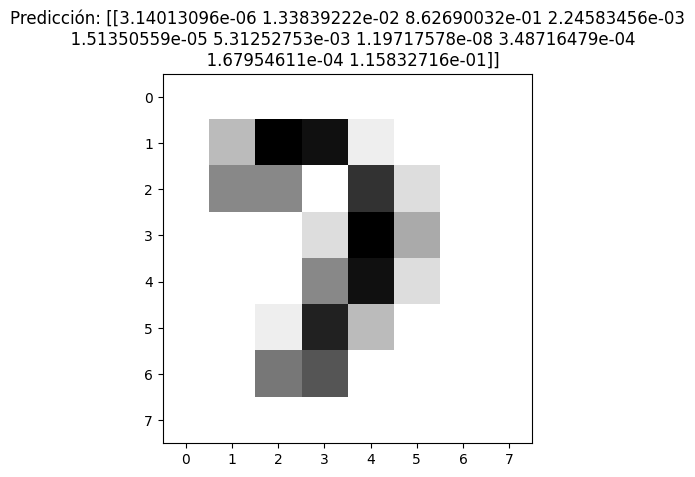

In [43]:
# Redimensionar la entrada del usuario para que tenga 64 características
user_input = np.array(user_input).flatten()

# Compilar el modelo (asegurándote de que la última capa tenga 8 unidades, ya que estamos tratando con matrices 8x8)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Realizar la predicción en la matriz ingresada
predicted_digit = model.predict(np.array([user_input]))

# Mostrar la imagen ingresada y la predicción
plt.imshow(np.array(user_input).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Predicción: {predicted_digit}")
plt.show()

### **aplicacion 2**

Epoch 1/10
36/36 [==============================] - 1s 7ms/step - loss: 1.6939 - accuracy: 0.5466 - val_loss: 0.6086 - val_accuracy: 0.7778
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.9008 - val_loss: 0.3204 - val_accuracy: 0.9097
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9530 - val_loss: 0.2461 - val_accuracy: 0.9340
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1165 - accuracy: 0.9730 - val_loss: 0.2070 - val_accuracy: 0.9306
Epoch 5/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9852 - val_loss: 0.1828 - val_accuracy: 0.9410
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9913 - val_loss: 0.1583 - val_accuracy: 0.9444
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9922 - val_loss: 0.1797 - val_accuracy: 0.9410
Epoch 8/10
36/36 [==

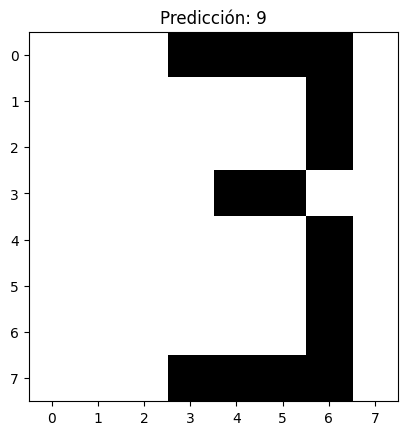

Predicción: 9


In [44]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos de dígitos de Scikit-Learn
digits = datasets.load_digits()

# Obtener las características (imágenes de dígitos) y las etiquetas (números reales que representan)
X = digits.images  # Usamos imágenes en lugar de datos
Y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Redimensionar las matrices de imágenes a vectores de 64 elementos (8x8 aplanados)
X_train = X_train.reshape(-1, 64)
X_test = X_test.reshape(-1, 64)

# Crear y entrenar un modelo de red neuronal en TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,)),  # Entrada de 64 características
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 unidades y función de activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta con 64 unidades y función de activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 unidades y función de activación Softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2,)#verbose=0  si se agrega este metodo se puede cancelar la vista del proceso de las epocas


# Define la matriz personalizada que deseas ingresar
user_input1 = [
    [0, 12, 0, 0, 0, 0, 12, 0],
    [0, 12, 0, 0, 0, 0, 12, 0],
    [0, 12, 0, 0, 0, 0, 12, 0],
    [0, 0, 12, 12, 12, 12, 0, 0],
    [0, 0, 0, 0, 0,16 , 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 15, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0]
]

user_input2 = [
    [0, 1, 2, 3, 4, 5, 6, 7],
    [7, 6, 5, 4, 3, 2, 1, 0],
    [0, 1, 2, 3, 4, 5, 6, 7],
    [7, 6, 5, 4, 3, 2, 1, 0],
    [0, 1, 2, 3, 4, 5, 6, 7],
    [7, 6, 5, 4, 3, 2, 1, 0],
    [0, 1, 2, 3, 4, 5, 6, 7],
    [7, 6, 5, 4, 3, 2, 1, 0]
]

user_input3 = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 15, 14, 1, 0, 0, 0],
    [0, 7, 7, 0, 12, 2, 0, 0],
    [0, 0, 0, 2, 15, 5, 0, 0],
    [0, 0, 0, 7, 14, 2, 0, 0],
    [0, 0, 1, 13, 4, 0, 0, 0],
    [0, 0, 8, 10, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
user_input4 = [
    [0, 0, 0, 16, 16, 16, 0, 0],
    [0, 6, 16, 0, 0, 16, 0, 0],
    [0, 16, 0, 0, 0, 16, 0, 0],
    [0, 0, 16, 16, 16, 16, 0, 0],
    [0, 0, 1, 0, 0, 16, 0, 0],
    [0, 0, 0, 0, 0, 16, 0, 0],
    [0, 0, 8, 0, 0, 16, 0, 0],
    [0, 0, 0, 16, 16, 0, 0, 0]
]
user_input5 = [
    [0, 0, 0, 3, 3, 3, 3, 0],
    [0, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 3, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 3, 3, 3, 3, 0]
]

# Redimensionar la entrada del usuario para que tenga 64 características
user_input = np.array(user_input5).flatten()

# Realizar la predicción en la matriz ingresada
predicted_digit = model.predict(np.array([user_input]))

# Obtener el dígito predicho
predicted_digit = np.argmax(predicted_digit)

# Mostrar la imagen ingresada y la predicción
plt.imshow(user_input.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Predicción: {predicted_digit}")
plt.show()

print(f"Predicción: {predicted_digit}")


### **Conclusion**


Si bien un modelo de aprendizaje profundo puede llegar a predecir el dígito en una matriz 8x8, no está exento de posibles fallos. Los modelos de inteligencia artificial, incluidas las redes neuronales, son poderosas herramientas para la clasificación y el reconocimiento de patrones, pero su rendimiento depende en gran medida de la calidad de los datos con los que se entrenan y de la complejidad de la tarea en cuestión.

En el caso de matrices personalizadas, como la que representaba el dígito "3", el modelo podría fallar si la matriz no se asemeja lo suficiente a los patrones que ha aprendido durante el entrenamiento. Además, el rendimiento del modelo puede verse afectado por la cantidad y diversidad de datos de entrenamiento disponibles, así como por la complejidad de la tarea de reconocimiento.

En resumen, si bien los modelos de aprendizaje automático pueden ser sorprendentemente precisos en muchas tareas, siempre es importante tener en cuenta que no son infalibles. La evaluación y validación continua de los modelos, junto con la adquisición de datos de alta calidad y la adaptación a la tarea específica, son fundamentales para minimizar los posibles fallos y mejorar la capacidad predictiva de los modelos.